## Table of contents

### 01. Import Data and Libraries

### 02. Using Excel with Python

### 03. Data Security

### 04. Comparing customer behavior in different geographic areas

### 05. Low and high activity customers

### 01. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [3]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged_s.pkl'))

In [4]:
# Checking the output
ords_prods.shape

(32404859, 33)

In [5]:
ords_prods

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender_identity,state,age,date_joined,dependants_#,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675.0,1.0,1.0,Organic Raspberry Black Tea,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210.0,1.0,0.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


### 02. Using Excel with Python

In [6]:
# Create a crosstab between the “days_since_prior_order” column and the “order_number” column
crosstab = pd.crosstab(ords_prods['days_since_prior_order'], ords_prods['order_number'], dropna = False)

In [7]:
crosstab.to_clipboard()

In [8]:
# Checking the output
crosstab.head(10)

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


### 03. Data Security

#### The dataset includes the first_name and the last_name that is PII.

In [9]:
# Addressing PII data 
ords_prods_sec = ords_prods.drop(columns = ['first_name', 'last_name'])

In [10]:
# Checking the output
ords_prods_sec.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
ords_prods_sec.shape

(32404859, 31)

### 04. Comparing customer behavior in different geographic areas

In [12]:
# Identify states
ords_prods_sec['state'].value_counts(dropna=False).sort_index(ascending=True)

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [13]:
# Conditions for 'Region'
result_region = []

for value in ords_prods_sec['state']:
 
  if (value in ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    result_region.append ('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
    result_region.append ('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
    result_region.append ('South') 
  else: result_region.append ('West')

In [14]:
# Creating a new column
ords_prods_sec['region']=result_region

In [15]:
# Checking the output
ords_prods_sec['region'].value_counts(dropna = False)

West         10858672
South         8226126
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [16]:
# Checking the output
ords_prods_sec.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,region
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


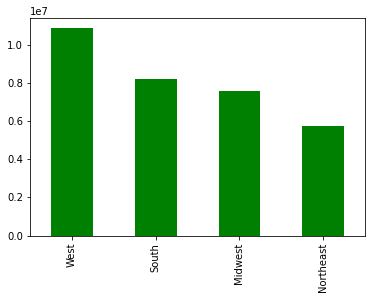

In [17]:
# Creating vizualisation for regions
regions = ords_prods_sec['region'].value_counts().plot.bar(color = 'green')

In [18]:
# Exporting the bar chart
regions = regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_count.png'))

In [19]:
ords_prods_sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float64 
 7   add_to_cart_order              float64 
 8   reordered                      float64 
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [20]:
# Explore a difference in spending habits between the different U.S. regions
crosstab_region_income = pd.crosstab(ords_prods_sec['region'], ords_prods_sec['spender_flag'], dropna = False)

In [21]:
# Checking the output
crosstab_region_income

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,164260,8061866
West,205785,10652887


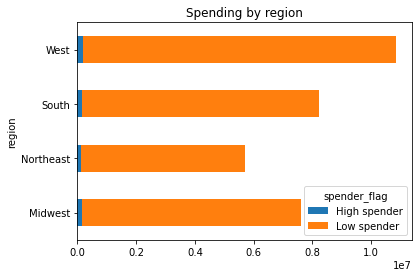

In [22]:
# Creating vizualisation: a stacked bar chart
crosstab_region_icome = crosstab_region_income.plot(kind = 'barh', stacked = True, title = 'Spending by region')

In [23]:
# Exporting the bar chart horizontal
crosstab_region_icome = crosstab_region_icome.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_by_region.png'))

#### The lion share is low spenders across the regions.

### 05. Low and high activity customers

In [24]:
# checking the value counts for column 'max_order'
ords_prods_sec['max_order'].value_counts(dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: max_order, Length: 99, dtype: int64

In [25]:
# Create an exclusion flag for low activity customers
ords_prods_sec.loc[ords_prods_sec['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [26]:
# Create an exclusion flag for high activity customers
ords_prods_sec.loc[ords_prods_sec['max_order'] >= 5, 'exclusion_flag'] = 'High activity customer'

In [27]:
# Checking the result
ords_prods_sec['exclusion_flag'].value_counts(dropna=False)

High activity customer    30964564
Low activity customer      1440295
Name: exclusion_flag, dtype: int64

In [28]:
# Create a dataset for the high activity customers
high_activity_custs = ords_prods_sec[ords_prods_sec['exclusion_flag'] =='High activity customer']

In [29]:
#Checking the result
high_activity_custs.shape

(30964564, 33)

In [30]:
# Exporting the high activity customers subset
high_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_high_activity.pkl'))